In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


## Dataset Preparation using Folder names

In [2]:
os.listdir("./images")

['cats', 'dogs', 'horses', 'humans']

In [3]:
dic = {
    'cat' : 0,
    'dog' : 1,
    'horse' : 2,
    'human' : 3
}

categories = os.listdir("./images")

In [4]:
categories

['cats', 'dogs', 'horses', 'humans']

In [5]:
img_data = []

for c in categories :
    path = "./images/" + c+"/"                 
    
    images = os.listdir(path)                  
    
    for i in images :
        
        img = plt.imread(path+i)                # Path of images 
        img = cv2.resize(img,(40,40))           # Keeping image size as 40x40
        img_data.append([img,dic[c[:-1]]])
        
    

In [6]:
img_data = np.array(img_data)
np.random.shuffle(img_data)             # Shuffling Training Data

In [7]:
X = []
y = []                                   # Splitting data into X and Y 

for i in range(img_data.shape[0]) :
    
    X.append(img_data[i][0])
    y.append(img_data[i][1])
    

In [8]:
X = np.array(X)
y = np.array(y)             # Converting list to array

In [9]:
X = np.reshape(X,(808,-1))
X.shape

(808, 4800)

## Image Plotting

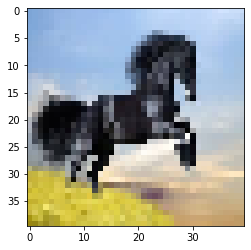

2


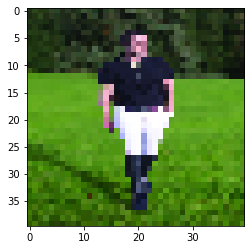

3


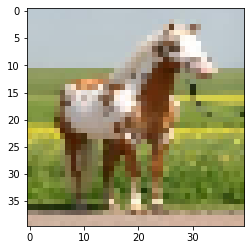

2


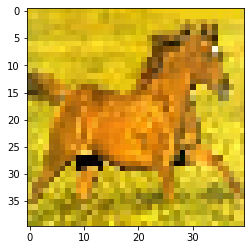

2


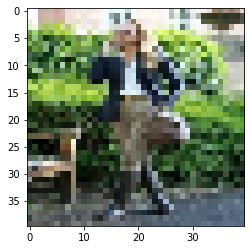

3


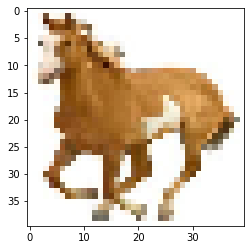

2


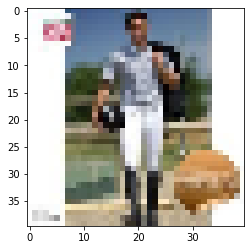

3


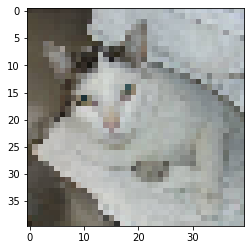

0


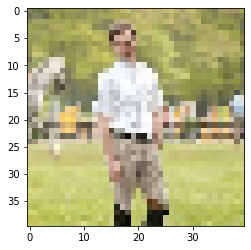

3


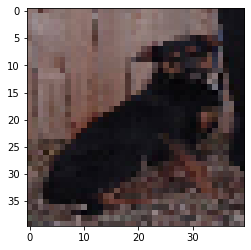

1


In [10]:
for i in range(10) :
    img = np.reshape(X[i],(40,40,-1))
    plt.imshow(img)
    plt.show()
    print(y[i])

## Data Dictionary for One-One Classifier


In [12]:
Classes = len(categories)
m = X.shape[0]

def Datagen(X,y) :
    
    data = {}
    for i in range(Classes):
        data[i] = []
    
    for i in range(m) :
        data[y[i]].append(X[i])
    
    for i in range(Classes) :
        data[i] = np.array(data[i])
    
    return data

data = Datagen(X,y)


## SVM Classifier (using PEGaSoS Algorithm)

In [ ]:
class SVM:
    
    def __init__ (self, C = 1.0) :
    
    # Constructor ...    
        self.W = 0.0
        self.b = 0.0
        self.C = C
        
    
    
    def hinge_loss(self,W,b,X,y) :       
        
        loss = 0.5*np.dot(W,W.T)                 # Using hinge-loss as error function. 
        
        for i in range(X.shape[0]) :             
            
            ti = y[i]*(np.dot(W,X[i].T) + b) 
            loss += self.C*max(0,1-ti)           # C -> penalty to accomodate outliers. C(default) = 1.0
            
    
        return loss[0][0]
    
    
    
    
    def fit(self, X, y, learning_rate = 0.00001, epochs = 850) :
                                       
        m = X.shape[0]                           
        n = X.shape[1]
        
        W = np.zeros((1,n))
        b = 0.0
        
        
        for i in range(epochs) : 
        
            gradient_W = 0.5*W
            gradient_b = 0.0
            
            for j in range(m) :                               # Using PEGaSoS algorithm for minimizing loss function. 
                
                ti = y[j]*(np.dot(W,X[j].T) + b) 
                
                if(ti<1) :
                    
                    gradient_W -= self.C*y[j]*X[j]              
                    gradient_b -= self.C*y[j]
                
                else :
                    gradient_W -= 0
                    gradient_b -= 0
                
            
            W = W - learning_rate*gradient_W                 # Weight and Bias updation.
            b = b - learning_rate*gradient_b    
            
        
        return W,b
    

## Train NC2 Classifiers in One vs. One Classification

In [13]:
def NC2_Classifiers(data) :
    
    classifiers = {}                                                # We need to train NC2 number of classfiers i.e
                                                                    # for each possible pair of classes and store the result
    for i in range(Classes) :
        
        for j in range(i+1,Classes) :
            
            training_data = np.vstack((data[i],data[j]))
            
            y1 = np.ones((data[i].shape[0],1))
            y2 = -1*np.ones((data[j].shape[0],1))                      
            
            training_label = np.vstack((y1,y2))
            
            classifier = SVM()
            W,b = classifier.fit(training_data,training_label)
            
            classifiers[(i,j)] = [W,b]
            
    
    return classifiers

In [14]:
classifiers = NC2_Classifiers(data)               # Classifier training

In [15]:
classifiers[(0,1)][0].shape

(1, 4800)

## Prediction functions

In [16]:
def bin_predict(X,W,b) :
    
    pred = 0
    z = np.dot(X,W.T)+b
    
    if(z>0) :
        pred = 1
    else :
        pred = -1
        
    return pred

In [17]:
def pred(x,classifiers) :
    
    count = np.zeros((Classes,))
    
    for i in range(Classes):
        for j in range(i+1,Classes) :
            
            W,b = classifiers[(i,j)]
            pred = bin_predict(x,W,b)
            
            if(pred==1) :
                count[i]+=1                      # One vs One classification technique
            else :                               
                count[j]+=1
                
    return np.argmax(count)
    

In [18]:
pred(X[10],classifiers)

0

In [19]:
y[10]

0

## Prediction and Accuracy

In [20]:
y_pred = np.zeros((y.shape[0],))

for i in range(y.shape[0]) :
    
    y_pred[i] = pred(X[i],classifiers)
    

In [21]:
cnt = 0
for i in range(y.shape[0]) :
    if(y_pred[i] == y[i]) :
        cnt+=1
        
print(cnt/y.shape[0])

0.8638613861386139


## 86% Accurate model